# Naive Bayes Classifier to detect Spam Emails

In [74]:
import numpy as np 
import pandas as pd 
from nltk.corpus import stopwords

In [75]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [76]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [77]:
# Replacing "Subject:" in every row
df.text = df.text.str.replace('Subject:','')

In [78]:
# Dropping unnecessary columns
df.drop(columns = {'Unnamed: 0','label_num'},inplace=True)

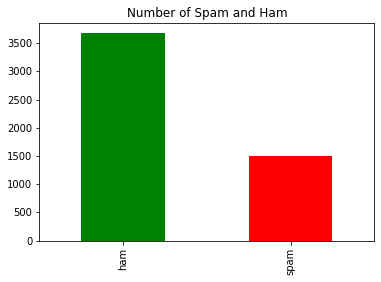

In [79]:
# plotting a graph for number of ham and spam
import matplotlib.pyplot as plt
count =pd.value_counts(df["label"], sort= True)
count.plot(kind= 'bar', color= ["green", "red"])
plt.title('Number of Spam and Ham')
plt.show()

In [80]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3672   3531   calpine daily gas nomination\r\n>\r\nricky a ...   20
spam   1499   1462                                               \r\n   16

In [81]:
print('Percentage of Ham emails in the datset',+len(df[df['label'] == 'ham'])/len(df) * 100)
print('Percentage of Spam emails in the datset',+len(df[df['label'] == 'spam'])/len(df) * 100)

Percentage of Ham emails in the datset 71.01140978534133
Percentage of Spam emails in the datset 28.98859021465867


In [82]:
# check the length of each subject
df['Length'] = df['text'].str.len()
df.head()

,label,text,Length
0,ham,enron methanol ; meter # : 988291\r\nthis is ...,319
1,ham,"hpl nom for january 9 , 2001\r\n( see attache...",89
2,ham,"neon retreat\r\nho ho ho , we ' re around to ...",2516
3,spam,"photoshop , windows , office . cheap . main t...",406
4,ham,re : indian springs\r\nthis deal is to book t...,328


## Data Pre-Processing

 We will follow below steps to clean the data:
    1. Remove special characters or numbers
    2. Change all the text into lowercase
    3. Split the text with space
    4. Remove stop words (commonly used word (such as “the”, “a”, “an”, “in”) which can be ignored)
    5. Perform Stemming (Stemming is a process where words are reduced to a root word) 
    5. Join the words back into sentence

In [83]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/lasya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
df['text'] = df['text'].replace("[^A-Za-z]", " ",regex=True)

In [85]:
df['text'] = df['text'].str.lower()

In [86]:
df['text'] = df['text'].str.split()

In [87]:
stemmer = PorterStemmer()

In [88]:
def apply_stemmer(text):
    message = [stemmer.stem(word) for word in text if word not in set(stopwords.words("english"))]
    message = " ".join(message) #Keeping cleaned words together
    return message

In [89]:
# Applying stemmer to all rows
subjects = []
for i in range(0, len(df)):
    stemmed_subject = apply_stemmer(df.text[i])
    subjects.append(stemmed_subject)

In [90]:
df = df.drop(["text"],axis=1)
df['text'] = subjects
df.head()

,label,Length,text
0,ham,319,enron methanol meter follow note gave monday p...
1,ham,89,hpl nom januari see attach file hplnol xl hpln...
2,ham,2516,neon retreat ho ho ho around wonder time year ...
3,spam,406,photoshop window offic cheap main trend abas d...
4,ham,328,indian spring deal book teco pvr revenu unders...


In [91]:
X = df['text']
y = df['label']

In [92]:
from sklearn.model_selection import train_test_split
#splitting the data in training and test set
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state = 48)

## CountVectorizer
The text must be parsed to remove words, called tokenization. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).

#### Scikit-learn’s CountVectorizer is used to transform text to a vector of term / token counts

In [93]:
# max_df = 0.50 means It ignores terms that appear in more than 50% of the documents
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words='english',max_df=0.5)

In [94]:
#fitting train and test data and then transforming it to count matrix
X_train = vector.fit_transform(X_train)
X_test = vector.transform(X_test)

# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [95]:
# fitting the model into train data 
model.fit(X_train,y_train)

# predicting the model on test data
y_pred = model.predict(X_test)

# checking accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy : ' ,accuracy_score(y_test,y_pred)*100)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy :  97.6159793814433
[[1098   19]
 [  18  417]]


## Testing the Model

In [96]:
new_text = pd.Series('you won lottery of 10000, please share your credit card details')
new_text_transform = vector.transform(new_text)
print(" The email is a" ,model.predict(new_text_transform))

 The email is a ['spam']


In [97]:
new_text = pd.Series('hope you are doing well')
new_text_transform = vector.transform(new_text)
print(" The email is a" ,model.predict(new_text_transform))

 The email is a ['ham']
